In [1]:
import numpy as np
from qiskit import QuantumCircuit
from qiskit import ClassicalRegister, QuantumRegister

In [2]:
# 회로 만들어주기
# 양자 회로 정의
q = QuantumRegister(2, 'q')
# 고전 회로 정의
c = ClassicalRegister(2, 'c')
# 회로 구성
circ = QuantumCircuit(q, c) # q, c는 숫자

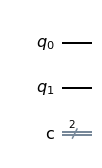

In [3]:
circ.draw('mpl')

In [4]:
# 게이트 작용하기
circ.h(0)
circ.cx(0, 1)

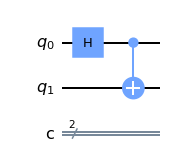

In [5]:
circ.draw('mpl')

In [6]:
from qiskit.quantum_info import Statevector

state = Statevector.from_int(0, 2**2)
state = state.evolve(circ)
state.draw('latex')

<IPython.core.display.Latex object>

{'11': 4087, '00': 4105}


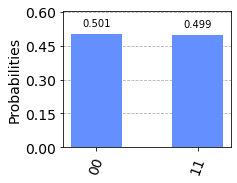

In [7]:
from qiskit import BasicAer, execute
from qiskit.visualization import plot_histogram, plot_state_city

# 측정
circ.barrier()
circ.measure(q[0], c[0])
circ.measure(q[1], c[1])

# 시뮬레이터 결정, 반복 측정
backend = BasicAer.get_backend('qasm_simulator')
shots = 8192
job_exp = execute(circ, backend=backend, shots=shots)

result = job_exp.result()
counts_exp = result.get_counts(circ)
print(result.get_counts(circ))
plot_histogram(counts_exp, figsize=(3,2.5))